## Setting up Kaggle Token

In [1]:
import os
os.environ["KAGGLE_API_TOKEN"] = "KGAT_d30ef88b82032c2de30f37023d664aad"

In [2]:
!pip install kagglehub --upgrade

In [3]:
import kagglehub

path = kagglehub.dataset_download("pranavkapratwar/fruit-classification")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fruit-classification' dataset.
Path to dataset files: /kaggle/input/fruit-classification


## Data Exploration:

In [4]:
import pandas as pd

df = pd.read_csv("/kaggle/input/fruit-classification/fruit_classification_dataset.csv")
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [6]:
df.describe()

,size (cm),weight (g),avg_price (₹)
count,10000.000000,10000.000000,10000.000000
mean,8.430600,455.457720,77.016720
std,6.396915,731.643087,38.946916
min,0.900000,4.500000,9.000000
25%,3.700000,45.800000,45.575000
50%,7.200000,168.800000,75.400000
75%,10.100000,365.275000,100.700000
max,27.500000,3299.800000,165.000000


In [7]:
df['fruit_name'].unique()

array(['watermelon', 'custard apple', 'papaya', 'banana', 'pomegranate',
       'grape', 'plum', 'guava', 'blueberry', 'coconut', 'cherry',
       'mango', 'pineapple', 'pear', 'lychee', 'apple', 'orange',
       'dragon fruit', 'kiwi', 'strawberry'], dtype=object)

In [8]:
df['fruit_name'].value_counts()

,count
fruit_name,
pear,534
pomegranate,534
pineapple,533
custard apple,516
papaya,509
kiwi,506
blueberry,503
banana,502
coconut,502


## Visualization of Dataset:

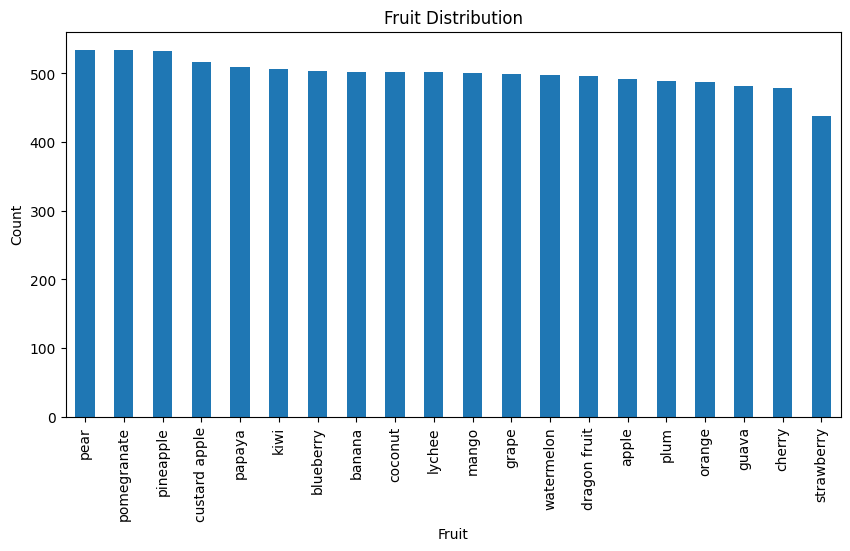

In [9]:
import matplotlib.pyplot as plt

df['fruit_name'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Fruit Distribution")
plt.xlabel("Fruit")
plt.ylabel("Count")
plt.show()

## Training

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


X = df.drop("fruit_name", axis=1) # Features
y = df["fruit_name"] # Labels

numeric_cols = ["size (cm)", "weight (g)", "avg_price (₹)"]
categorical_cols = ["shape", "color", "taste"]

# One-Hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [11]:
# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['shape', 'color', 'taste']),
                                                 ('num', 'passthrough',
                                                  ['size (cm)', 'weight (g)',
                                                   'avg_price (₹)'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [14]:
from sklearn.metrics import accuracy_score, classification_report
# Accuracy report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 1.0
               precision    recall  f1-score   support

        apple       1.00      1.00      1.00        99
       banana       1.00      1.00      1.00       103
    blueberry       1.00      1.00      1.00       116
       cherry       1.00      1.00      1.00        89
      coconut       1.00      1.00      1.00       111
custard apple       1.00      1.00      1.00        99
 dragon fruit       1.00      1.00      1.00        96
        grape       1.00      1.00      1.00       115
        guava       1.00      1.00      1.00        84
         kiwi       1.00      1.00      1.00        96
       lychee       1.00      1.00      1.00       107
        mango       1.00      1.00      1.00        87
       orange       1.00      1.00      1.00        89
       papaya       1.00      1.00      1.00        96
         pear       1.00      1.00      1.00       106
    pineapple       1.00      1.00      1.00        93
         plum       1.00      1.00      1.00      

## Confusion Matrix/Training And Testing Visualization

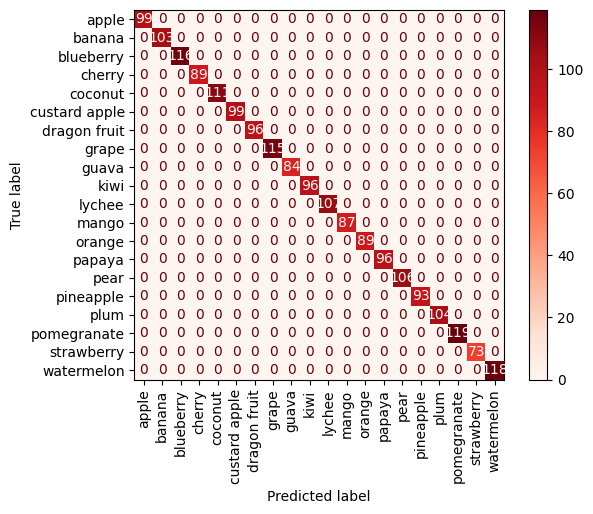

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=label_encoder.classes_,
    xticks_rotation='vertical',
    cmap='Reds'
)
plt.show()

This heatmap shows the performance of the classification model with the fruit dataset. As seen in the confusion matrix the models accuracy is 100% and has no misclassifications.

## Manual Testing

In [16]:
sample = pd.DataFrame({
    "size (cm)": [15],
    "shape": ["round"],
    "weight (g)": [400],
    "avg_price (₹)": [80],
    "color": ["red"],
    "taste": ["sweet"]
})

sample1 = pd.DataFrame({
    "size (cm)": [12],
    "shape": ["long"],
    "weight (g)": [120],
    "avg_price (₹)": [40],
    "color": ["yellow"],
    "taste": ["sweet"]
})

sample2 = pd.DataFrame({
    "size (cm)": [8],
    "shape": ["round"],
    "weight (g)": [180],
    "avg_price (₹)": [90],
    "color": ["red"],
    "taste": ["sweet"]
})

sample3 = pd.DataFrame({
    "size (cm)": [25],
    "shape": ["oval"],
    "weight (g)": [900],
    "avg_price (₹)": [120],
    "color": ["yellow"],
    "taste": ["sweet"]
})

sample4 = pd.DataFrame({
    "size (cm)": [25],
    "shape": ["round"],
    "weight (g)": [3000],
    "avg_price (₹)": [140],
    "color": ["green"],
    "taste": ["sweet"]
})

samples = [sample, sample1, sample2, sample3, sample4]

for i, sample in enumerate(samples, start=1):
    pred = model.predict(sample)
    fruit = label_encoder.inverse_transform(pred)[0]
    print(f"Prediction for sample{i}: {fruit}")

Prediction for sample1: pomegranate
Prediction for sample2: banana
Prediction for sample3: apple
Prediction for sample4: mango
Prediction for sample5: watermelon


## More Visualizations


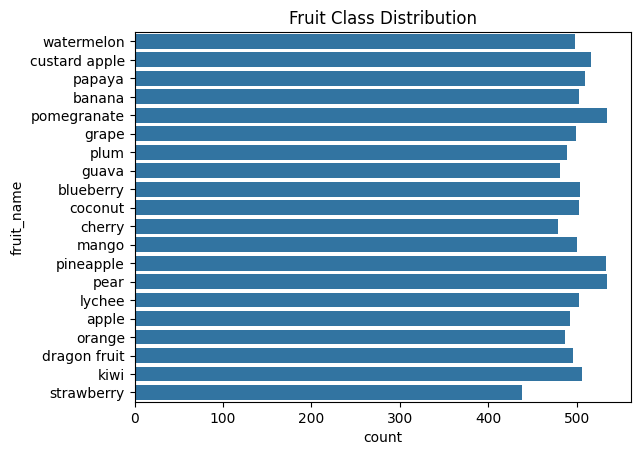

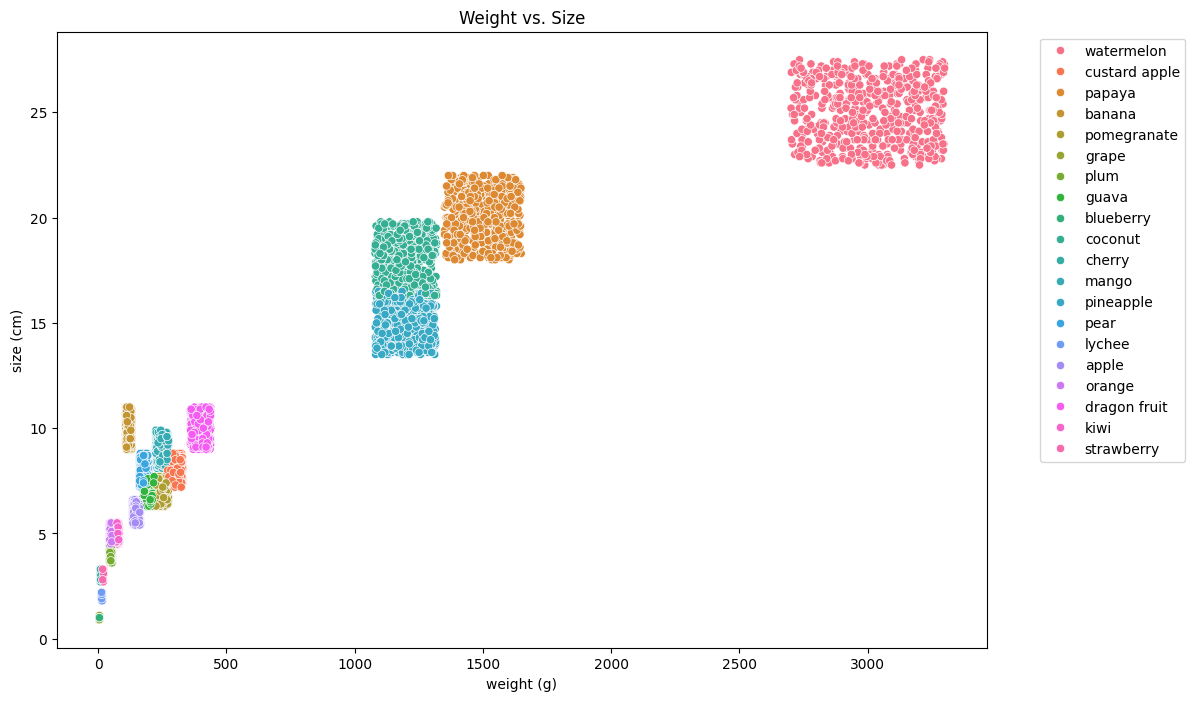

In [17]:
import seaborn as sns

sns.countplot(y=df["fruit_name"])
plt.title("Fruit Class Distribution")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="weight (g)", y="size (cm)", hue="fruit_name")
plt.title("Weight vs. Size")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The first graph just displays the amount of samples that exist for each type of fruit in the dataset. The relevance of this graph is primarily to show the class balance with how some fruits have more examples than others. The second graph is a scatterplot depicting how weight and size factor into a fruits classification. Fruit samples that have similar weight and size are generally the same fruit as seen by the colored dots on the plot. This visualization also explains pretty well how the model reached 100% accuracy as the fruit features are clearly seperable between fruit types.